In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/images/017351.jpg  
  inflating: Dataset/images/017352.jpg  
  inflating: Dataset/images/017353.jpg  
  inflating: Dataset/images/017354.jpg  
  inflating: Dataset/images/017355.jpg  
  inflating: Dataset/images/017356.jpg  
  inflating: Dataset/images/017357.jpg  
  inflating: Dataset/images/017358.jpg  
  inflating: Dataset/images/017359.jpg  
  inflating: Dataset/images/017360.jpg  
  inflating: Dataset/images/017361.jpg  
  inflating: Dataset/images/017362.jpg  
  inflating: Dataset/images/017363.jpg  
  inflating: Dataset/images/017364.jpg  
  inflating: Dataset/images/017365.jpg  
  inflating: Dataset/images/017366.jpg  
  inflating: Dataset/images/017367.jpg  
  inflating: Dataset/images/017368.jpg  
  inflating: Dataset/images/017369.jpg  
  inflating: Dataset/images/017370.jpg  
  inflating: Dataset/images/017371.jpg  
  inflating: Dataset/images/017372.jpg  
  inflating: Dataset/images/017373.jpg  
  infl

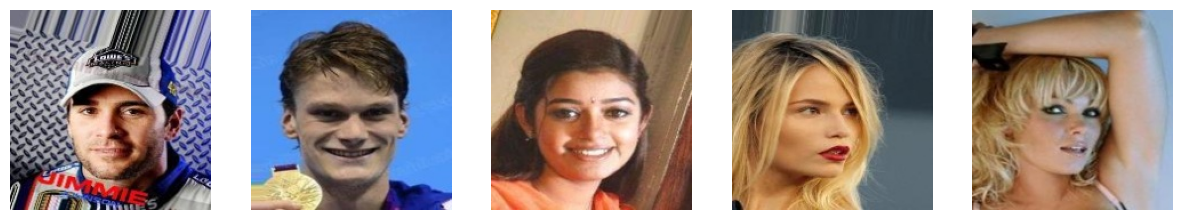

In [ ]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Directory containing the images
image_directory = '/content/Dataset/images'

# Get a list of image file names
image_files = os.listdir(image_directory)

# Display the first few images
num_images_to_display = 5

fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

for i in range(num_images_to_display):
    # Load and display each image
    image_path = os.path.join(image_directory, image_files[i])
    image = imread(image_path)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.show()


In [ ]:
print(len(os.listdir('/content/Dataset/images')))

22350


In [ ]:
image_path = os.path.join(image_directory, os.listdir(image_directory)[0])
sample_image = imread(image_path)
IMG_SHAPE = sample_image.shape

print("IMG_SHAPE:", IMG_SHAPE)


IMG_SHAPE: (176, 176, 3)


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Tạo thư mục mới cho tập test
os.makedirs('/content/TestDataset/images', exist_ok=True)

# Lấy danh sách tất cả các tệp tin trong thư mục gốc
all_files = os.listdir('/content/Dataset/images')

# Chia dữ liệu thành tập train và tập test
train_files, test_files = train_test_split(all_files, test_size=0.2, random_state=42)

# Di chuyển ảnh tập test vào thư mục mới
for file in test_files:
    src_path = os.path.join('/content/Dataset/images', file)
    dest_path = os.path.join('/content/TestDataset/images', file)
    shutil.move(src_path, dest_path)


In [ ]:
from PIL import Image
import os

def is_valid_image(file_path):
    try:
        img = Image.open(file_path)
        img.verify()
        return True
    except (IOError, SyntaxError):
        return False

def remove_invalid_images(directory_path):
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        if not is_valid_image(file_path):
            print(f"Removing invalid image: {file_path}")
            os.remove(file_path)


# Kiểm tra và xóa các tệp không hợp lệ trong thư mục
remove_invalid_images('/content/Dataset/images')
remove_invalid_images('/content/TestDataset/images')

Removing invalid image: /content/Dataset/images/022242.jpg
Removing invalid image: /content/Dataset/images/022302.jpg
Removing invalid image: /content/Dataset/images/022339.jpg
Removing invalid image: /content/Dataset/images/022298.jpg
Removing invalid image: /content/Dataset/images/022237.jpg
Removing invalid image: /content/Dataset/images/022261.jpg
Removing invalid image: /content/Dataset/images/022235.jpg
Removing invalid image: /content/Dataset/images/022294.jpg
Removing invalid image: /content/Dataset/images/022345.jpg
Removing invalid image: /content/Dataset/images/022320.jpg
Removing invalid image: /content/Dataset/images/022300.jpg
Removing invalid image: /content/Dataset/images/022312.jpg
Removing invalid image: /content/Dataset/images/022270.jpg
Removing invalid image: /content/Dataset/images/022316.jpg
Removing invalid image: /content/Dataset/images/022238.jpg
Removing invalid image: /content/Dataset/images/022236.jpg
Removing invalid image: /content/Dataset/images/022336.j

In [ ]:
print(len(os.listdir('/content/Dataset/images')))
print(len(os.listdir('/content/TestDataset/images')))

17786
4445


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Khởi tạo ImageDataGenerator cho tập huấn luyện
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Chuẩn hóa giá trị pixel về khoảng [0, 1]
)

# Khởi tạo ImageDataGenerator cho tập testing
test_datagen = ImageDataGenerator(
    rescale=1./255
)

# Tạo generator cho tập huấn luyện
train_generator = train_datagen.flow_from_directory(
    '/content/Dataset',
    target_size=(176, 176),
    batch_size=32,
    class_mode='input',
    shuffle=True
)

# Tạo generator cho tập testing
test_generator = test_datagen.flow_from_directory(
    '/content/TestDataset',
    target_size=(176, 176),
    batch_size=32,
    class_mode='input',
    shuffle=False
)


Found 17786 images belonging to 1 classes.
Found 4445 images belonging to 1 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers as L

def build_deep_autoencoder(img_shape, code_size):
    H, W, C = img_shape

    # Encoder
    encoder = tf.keras.models.Sequential()
    encoder.add(L.InputLayer(img_shape))

    encoder.add(L.Conv2D(filters=32, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=64, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=256, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Flatten())
    encoder.add(L.Dense(code_size, activation='elu'))

    # Decoder
    decoder = tf.keras.models.Sequential()
    decoder.add(L.InputLayer((code_size,)))

    decoder.add(L.Dense(11 * 11 * 256, activation='elu'))
    decoder.add(L.Reshape((11, 11, 256)))
    decoder.add(L.Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=32, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=3, kernel_size=(3, 3), strides=2, activation=None , padding='same'))


    return encoder, decoder

# Kích thước của ảnh
img_shape = (176, 176, 3)
code_size = 128

# Xây dựng mô hình
encoder, decoder = build_deep_autoencoder(img_shape, code_size)

# Hiển thị thông tin của mô hình
encoder.summary()
decoder.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 176, 176, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 88, 88, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 88, 88, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 44, 44, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 22, 22, 128)       0

In [ ]:
inp = L.Input((176, 176, 3))
code = encoder(inp)
reconstruction = decoder(code)

In [ ]:
autoencoder = tf.keras.models.Model(inputs=inp, outputs=reconstruction)
autoencoder.compile(optimizer="adamax", loss='mse')

In [ ]:
from tensorflow.keras.models import save_model

class ModelSaveCallback(tf.keras.callbacks.Callback):
    def __init__(self, file_name):
        super(ModelSaveCallback, self).__init__()
        self.file_name = file_name

    def on_epoch_end(self, epoch, logs=None):
        model_filename = self.file_name.format(epoch)
        save_model(self.model, model_filename)
        print("Model saved in {}".format(model_filename))

In [ ]:
model_filename = 'autoencoder.{0:03d}.hdf5'
last_finished_epoch = None
autoencoder.fit(train_generator, epochs=20,
                validation_data=test_generator,
                callbacks=[ModelSaveCallback(model_filename)],
                           #keras_utils.TqdmProgressCallback()],
                verbose=1,
                initial_epoch=last_finished_epoch or 0
               )

Epoch 1/20
556/556 [==============================] - ETA: 0s - loss: 0.0290

<ipython-input-16-4dd3a9deb8af>:10: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(self.model, model_filename)


Model saved in autoencoder.000.hdf5
556/556 [==============================] - 55s 82ms/step - loss: 0.0290 - val_loss: 0.0147
Epoch 2/20
556/556 [==============================] - 43s 78ms/step - loss: 0.0128 - val_loss: 0.0115
Epoch 3/20
556/556 [==============================] - 42s 76ms/step - loss: 0.0109 - val_loss: 0.0103
Epoch 4/20
556/556 [==============================] - 44s 78ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 5/20
556/556 [==============================] - 44s 79ms/step - loss: 0.0094 - val_loss: 0.0092
Epoch 6/20
556/556 [==============================] - 45s 81ms/step - loss: 0.0089 - val_loss: 0.0092
Epoch 7/20
556/556 [==============================] - 42s 76ms/step - loss: 0.0085 - val_loss: 0.0084
Epoch 8/20
556/556 [==============================] - 43s 77ms/step - loss: 0.0082 - val_loss: 0.0083
Epoch 9/20
556/556 [==============================] - 43s 77ms/step - loss: 0.0080 - val_loss: 0.0082
Epoch 10/20
556/556 [==============================] - 43

In [ ]:
latents = encoder.predict(train_generator)

from sklearn.neighbors import NearestNeighbors

# Khởi tạo mô hình tìm kiếm KNN, sử dụng độ đo là consin similarity
knn_model = NearestNeighbors(n_neighbors=5, metric='cosine')

knn_model.fit(latents)


556/556 [==============================] - 22s 39ms/step


NearestNeighbors(metric='cosine')

1/1 [==============================] - 0s 18ms/step


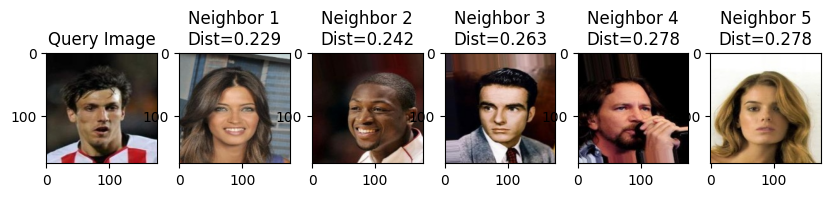

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def display_nearest_neighbors(image_index, n_neighbors=5):
    batch = next(test_generator)
    images, labels = batch

    query_latents = encoder.predict(images[image_index][None])

    distances, indices = knn_model.kneighbors(query_latents)

    # Display
    plt.figure(figsize=(10, 5))
    plt.subplot(1, n_neighbors + 1, 1)
    plt.imshow(images[image_index])
    plt.title('Query Image')

    for i in range(n_neighbors):
        plt.subplot(1, n_neighbors + 1, i + 2)
        neighbor_index = indices[0][i]
        plt.imshow(images[neighbor_index % len(images)])
        plt.title(f'Neighbor {i + 1}\nDist={distances[0][i]:.3f}')

    plt.show()


display_nearest_neighbors(image_index=1)


1/1 [==============================] - 0s 17ms/step


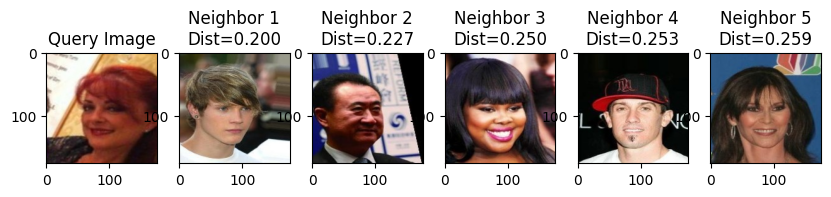

In [ ]:
display_nearest_neighbors(image_index=3)


1/1 [==============================] - 0s 28ms/step


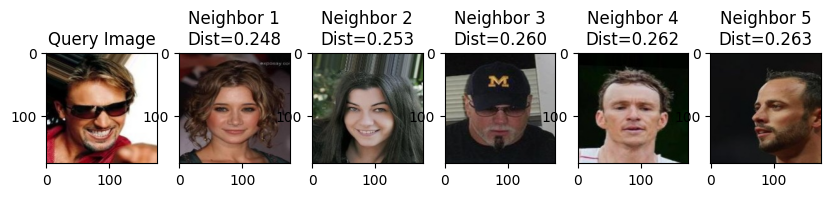

In [ ]:
display_nearest_neighbors(image_index=6)
